# Importing useful Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Uploading dataset from local file directory 

In [2]:
#Use data = pd.read_csv("link/url to data.csv") to get the data
data = pd.read_csv('fuel_ferc1.csv')
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


# Question 1 : Operational cost of for each plant

There are three costs included in the dataset 
   * fuel_cost_per_unit_burned 
   * fuel_cost_per_unit_delivered
   * fuel_cost_per_mmbtu

$$ Fuel\_cost\_ burned = fuel\_qty\_burned * fuel\_cost\_per\_unit\_burned ---------(1) $$
$$ fuel\_cost\_ mmbtu = fuel\_qty\_burned * fuel\_mmbtu\_per\_unit * fuel\_cost\_per\_mmbtu ------(2) $$
On the assumption that, 100% of fuel delivered was fuel burnt.
$$ fuel\_qty\_burned = fuel\_qty\_delivered $$
Therefore, $$ fuel\_cost\_delivered = fuel\_qty\_burned * fuel\_cost\_per\_unit\_delivered -----(3) $$
Since Operational cost would be the addition of all cost but since the fuel cost on quantity burnt would mean same as fuel cost on energy produced by fuel burnt. We then disregard the fuel cost on energy produced.
$$ operational\_cost = Fuel\_cost\_ burned * fuel\_cost\_delivered ------(4) $$

In [3]:
data['fuel_cost_burned'] = data['fuel_qty_burned'] * data['fuel_cost_per_unit_burned']
data['fuel_cost_delivered'] =  data['fuel_qty_burned'] * data['fuel_cost_per_unit_delivered']
data['fuel_cost_mmbtu'] = data['fuel_qty_burned'] * data['fuel_mmbtu_per_unit'] * data['fuel_cost_per_mmbtu']
data['operational_cost'] = data['fuel_cost_burned'] + data['fuel_cost_delivered']
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,fuel_cost_burned,fuel_cost_delivered,fuel_cost_mmbtu,operational_cost
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,9.996752e+07,9.964487e+07,1.000073e+08,1.996124e+08
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,1.948474e+08,1.943231e+08,1.948793e+08,3.891705e+08
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,1.183133e+08,1.135474e+08,1.185948e+08,2.318607e+08
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970,1.765410e+08,1.719789e+08,1.764345e+08,3.485199e+08
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570,1.122764e+05,1.122764e+05,1.041698e+05,2.245528e+05


# Question 2 : How fuel cost impacts the viability of different generation sources.

In [4]:
data = pd.read_csv('fuel_ferc1.csv')
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


The viability of each fuel type is judged according to how much of it was burned as that wouold clearly show how much was used up as a source of power(electricity) generation.



In [5]:
param = ['report_year', 'fuel_cost_per_unit_burned', 'fuel_qty_burned']
for code in data['fuel_type_code_pudl'].unique():
    if code=='coal':
        coal = data.loc[data['fuel_type_code_pudl']==code, param]
    elif code=='gas':
        gas = data.loc[data['fuel_type_code_pudl']==code, param]
    elif code=='nuclear':
        nuclear = data.loc[data['fuel_type_code_pudl']==code, param]
    elif code=='oil':
        oil = data.loc[data['fuel_type_code_pudl']==code, param]
    elif code=='waste':
        waste = data.loc[data['fuel_type_code_pudl']==code, param]
    elif code=='other':
        other = data.loc[data['fuel_type_code_pudl']==code, param]

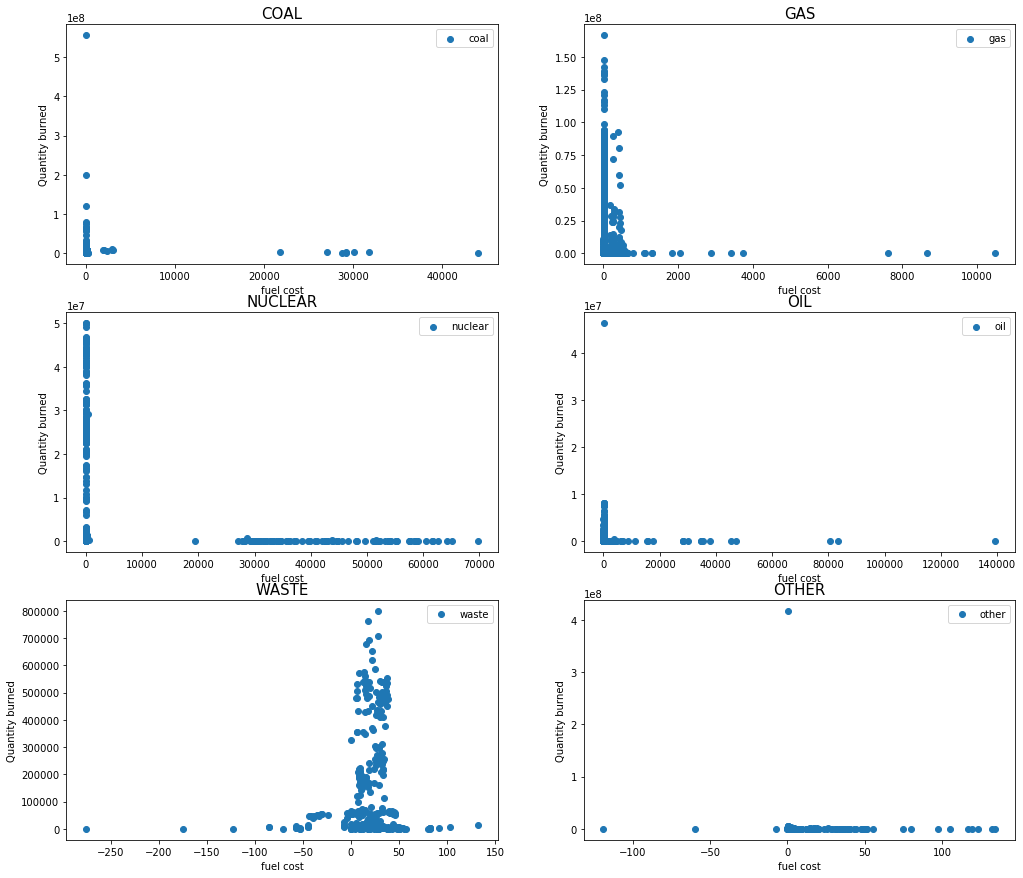

In [6]:
datas = [coal, gas, nuclear, oil, waste, other]
titles = ['coal', 'gas', 'nuclear', 'oil', 'waste', 'other']
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(figsize=(17,15), nrows=3, ncols=2)
for data, axis, title in zip(datas, [ax1,ax2,ax3,ax4,ax5,ax6], titles):
    axis.scatter('fuel_cost_per_unit_burned', 'fuel_qty_burned', data=data, label=title)
    axis.set(xlabel= 'fuel cost', ylabel='Quantity burned')
    axis.set_title(title.upper(), fontsize=15)
    axis.legend()

As was expected, we can see from the charts that the lower the fuel cost, the more viable it becomes. Consumption on each fuel source was seen to be at its greatest around 0 where it shows its the least cost. Conversely, the least consumption was recorded at extreme values of fuel cost.

# Question 3 : Competitiveness of renewable electricity

The competitiveness of renewable electricity was analyzed here, based on the quantity of fuel burned rather than how many plants utilized each fuel type (coal, gas, nuclear, other, waste and oil) over the years from 1994 to 2018.


## getting our data ready

Defining functions that would get the total quantity of fuel burnt for each fuel type in a particular. The function takes the argument "year" signifying the Report year data required.

In [7]:
data = pd.read_csv('fuel_ferc1.csv')

In [8]:
def get_coal_qty(year):
    qty = data[(data['report_year']==year) & (data['fuel_type_code_pudl']=='coal')]['fuel_qty_burned'].sum()
    return qty

In [9]:
def get_gas_qty(year):
    qty = data[(data['report_year']==year) & (data['fuel_type_code_pudl']=='gas')]['fuel_qty_burned'].sum()
    return qty

In [10]:
def get_nuclear_qty(year):
    qty = data[(data['report_year']==year) & (data['fuel_type_code_pudl']=='nuclear')]['fuel_qty_burned'].sum()
    return qty

In [11]:
def get_oil_qty(year):
    qty = data[(data['report_year']==year) & (data['fuel_type_code_pudl']=='oil')]['fuel_qty_burned'].sum()
    return qty

In [12]:
def get_waste_qty(year):
    qty = data[(data['report_year']==year) & (data['fuel_type_code_pudl']=='waste')]['fuel_qty_burned'].sum()
    return qty

In [13]:
def get_other_qty(year):
    qty = data[(data['report_year']==year) & (data['fuel_type_code_pudl']=='other')]['fuel_qty_burned'].sum()
    return qty

### Compilation of data

Storing all total quantity of fuel burnt for each year in their respective object variable.

In [14]:
coal_qty = [get_coal_qty(year) for year in data["report_year"].unique()]
gas_qty = [get_gas_qty(year) for year in data["report_year"].unique()]
nuclear_qty = [get_nuclear_qty(year) for year in data["report_year"].unique()]
oil_qty = [get_oil_qty(year) for year in data["report_year"].unique()]
waste_qty = [get_waste_qty(year) for year in data["report_year"].unique()]
other_qty = [get_other_qty(year) for year in data["report_year"].unique()]
years = [i for i in data['report_year'].unique()]

### A view of our data

In [15]:
df = pd.DataFrame({'year': years, 'coal': coal_qty, 'gas': gas_qty, 'nuclear': nuclear_qty, 'oil': oil_qty, 'waste': waste_qty, 'other': other_qty, })
df.head()

,year,coal,gas,nuclear,oil,waste,other
0,1994,7.172082e+08,2.432212e+09,206936645.0,1469716.0,1242241.0,5094458.0
1,1995,1.257398e+09,2.570880e+09,205408058.0,809178.0,1642051.0,422054754.0
2,1996,6.988514e+08,1.915218e+09,148738376.0,3637754.0,1102632.0,1144943.0
3,1997,8.169024e+08,2.039925e+09,162556374.0,53849314.0,1528774.0,3211371.0
4,1998,8.982095e+08,2.554651e+09,150463637.0,543608.0,1624599.0,11577962.0


This data has the Total Quantity of each fuel burnt per year in the data report year.

### FIG 1,2 & 3 contains bars and line chart of the Total Quantity burnt versus the Year for each fuel type

##### The 6 fuel source were splitted into 2 charts to reduce ambiguity of the data thus making it more readable and visible

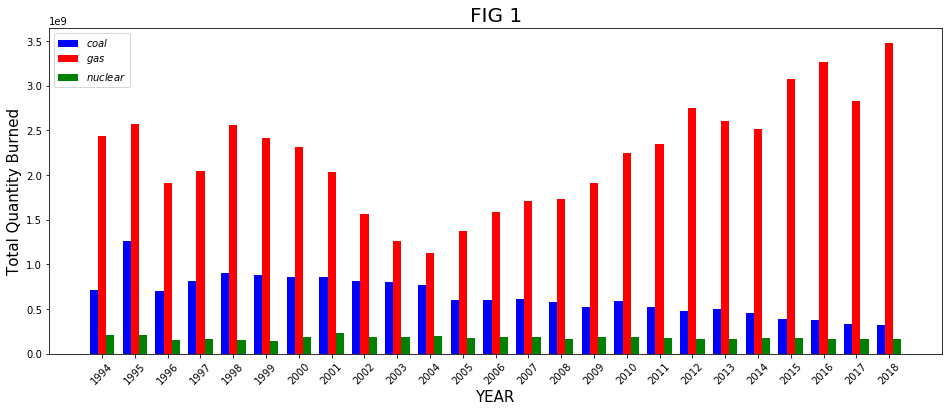

In [16]:
fig, ax= plt.subplots(figsize= (16,6))
ab = np.arange(len(df))
ax.bar(ab, 'coal', color= 'blue', data= df, label= '$coal$', width=0.25)
ax.bar([i+0.25 for i in ab], 'gas', color= 'red', data= df, label= '$gas$', width=0.25)
ax.bar([i+(0.25*2) for i in ab], 'nuclear', color= 'green', data= df, label= '$nuclear$', width=0.25)


ax.set_xlabel('YEAR', fontsize=15)
ax.set_ylabel('Total Quantity Burned', fontsize=15)
ax.set_title('FIG 1', fontsize=20)
ax.set_xticks([i+0.25 for i in ab])
ax.set_xticklabels(years, rotation= 45);
ax.legend();



## FIG 1
* As can be seen, it combined coal, gas and nuclear sources
* Gas tops the chart, followed by Coal and lastly Nuclear
* This shows that Gas is the most sort source of fuel amongst the three metioned above

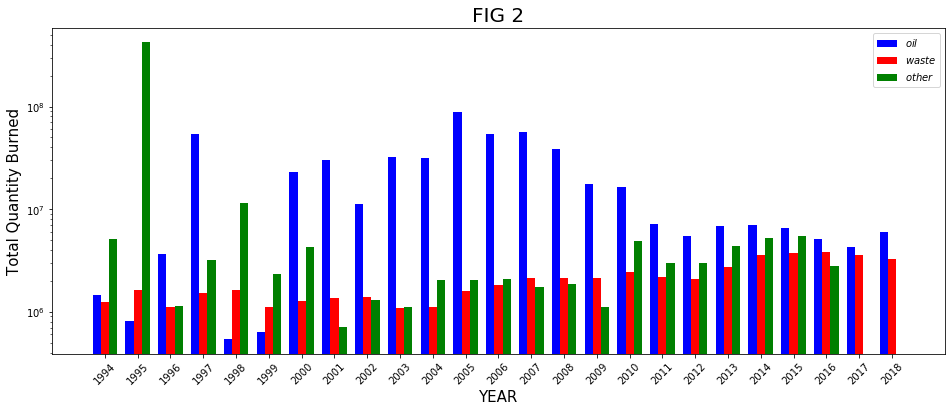

In [17]:
fig, ax= plt.subplots(figsize= (16,6))
ab = np.arange(len(df))
ax.bar(ab, 'oil', color= 'blue', data= df, label= '$oil$', width=0.25)
ax.bar([i+0.25 for i in ab], 'waste', color= 'red', data= df, label= '$waste$', width=0.25)
ax.bar([i+(0.25*2) for i in ab], 'other', color= 'green', data= df, label= '$other$', width=0.25)

ax.set_xlabel('YEAR', fontsize=15)
ax.set_ylabel('Total Quantity Burned', fontsize=15)
ax.set_title('FIG 2', fontsize=20)
ax.set_yscale('log')
ax.set_xticks([i+0.25 for i in ab])
ax.set_xticklabels(years, rotation= 45)
ax.legend();



## FIG 2
* As can be seen, it combined oil, waste and other sources
* Genrally, oil seems to top the chart, followed by other and waste but there seemed to be a very high demand for other fuel types in ther year 1995 after which the demand significantly dropped


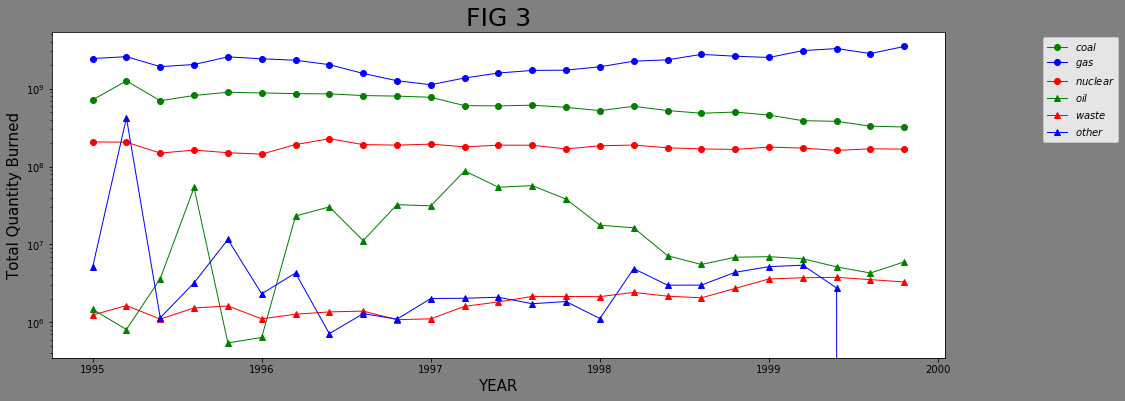

In [18]:
fig, ax= plt.subplots(figsize= (16,6))

ax.plot('coal', 'go-', data= df, label= '$coal$', linewidth=1)
ax.plot('gas', 'bo-', data= df, label= '$gas$', linewidth=1)
ax.plot('nuclear', 'ro-', data= df, label= '$nuclear$', linewidth=1)
ax.plot('oil', 'g^-',  data= df, label= '$oil$', linewidth=1)
ax.plot('waste','r^-' , data= df, label= '$waste$', linewidth=1)
ax.plot('other', 'b^-', data= df, label= '$other$', linewidth=1)


fig.set_facecolor('grey')
ax.set_yscale('log')
ax.set_xlabel('YEAR', fontsize=15)
ax.set_ylabel('Total Quantity Burned', fontsize=15)
ax.set_title('FIG 3', fontsize=25)
ax.set_xticklabels(years)
ax.legend(loc='upper right', bbox_to_anchor=(1.2,1.0))

## FIG 3
* A combined view of all sources
* Generally, below are the order of demand for diff. fuel sources across the years
    * Gas
    * Coal
    * Nuclear
    * Oil
    * Other
    * Waste
* It is worthy to note that the demand for "Other" fuel type dropped to zero all through 2017 to 2018

# Question 4 : Generation mix over time

## utility_id_ferc1 = 1 as use case

In [19]:
df1 = data.loc[data['utility_id_ferc1']==1, ['fuel_type_code_pudl', 'fuel_qty_burned']]
df1

,fuel_type_code_pudl,fuel_qty_burned
0,coal,5377489.0
1,coal,10486945.0
1380,coal,5266522.0
1381,coal,10379108.0
3186,coal,5090798.0
...,...,...
27954,gas,4007761.0
28785,coal,3386119.0
28786,oil,14781.0
28787,coal,6772238.0


In [20]:
df1['fuel_type_code_pudl'].unique()

array(['coal', 'oil', 'gas'], dtype=object)

In [21]:
d=[]
for source in df1['fuel_type_code_pudl'].unique():
    d.append(df1[(df1['fuel_type_code_pudl']==source)]['fuel_qty_burned'].sum())
df3= pd.DataFrame({'fuel type':df1['fuel_type_code_pudl'].unique(), 'quantity': d })
df3

,fuel type,quantity
0,coal,347570193.0
1,oil,1232225.0
2,gas,268365016.0


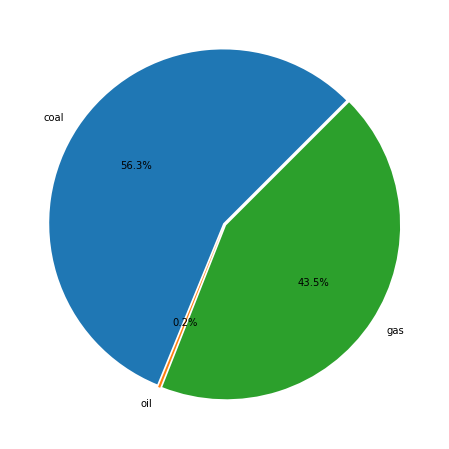

In [22]:
plt.figure(figsize=(8,8))
x1=df3['quantity']
labels = df3['fuel type']
plt.pie(x1, labels = labels, explode=[0.01,0.01,0.01], startangle = 45, autopct= '%1.1f%%');

Using, utility_id_ferc1 is 1:
* The mix involves only Coal, Gas and Oil all through the year
* Although Oil is not significantly used in comparism to the others, Coal emerged as most used with 56.3% of total fuel burnt by utility 1. And Gas following right behind it with 43.5% burnt all through the record years